In [1]:
!pip install fredapi pandas numpy scikit-learn matplotlib

In [2]:
# Step 1: Install Required Libraries
!pip install fredapi pandas numpy scikit-learn matplotlib

# Step 2: Data Collection
from fredapi import Fred
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual API key
api_key = 'e3bdf6e77fac5200fa452b37ae4a0246'
fred = Fred(api_key=api_key)

# Download the S&P Case-Shiller Home Price Index data
home_price_index = fred.get_series('CSUSHPISA')
home_price_df = pd.DataFrame({'Date': home_price_index.index, 'Home_Price_Index': home_price_index.values})

# Display the first few rows of the DataFrame
home_price_df.head()


,Date,Home_Price_Index
0,1975-01-01,NaN
1,1975-02-01,NaN
2,1975-03-01,NaN
3,1975-04-01,NaN
4,1975-05-01,NaN


In [3]:
# Step 3: Data Preprocessing

# Check for missing values
missing_values = home_price_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values by dropping rows with any NaN values
home_price_df = home_price_df.dropna()

# Display the first few rows of the DataFrame after handling missing values
home_price_df.head()



Missing Values:
Date                  0
Home_Price_Index    144
dtype: int64


,Date,Home_Price_Index
144,1987-01-01,63.965
145,1987-02-01,64.424
146,1987-03-01,64.736
147,1987-04-01,65.132
148,1987-05-01,65.563


In [4]:
# Step 4: Feature Engineering

# Create a lagged variable for the Home Price Index
home_price_df['Home_Price_Index_Lag1'] = home_price_df['Home_Price_Index'].shift(1)

# Display the first few rows of the DataFrame after feature engineering
home_price_df.head()


,Date,Home_Price_Index,Home_Price_Index_Lag1
144,1987-01-01,63.965,NaN
145,1987-02-01,64.424,63.965
146,1987-03-01,64.736,64.424
147,1987-04-01,65.132,64.736
148,1987-05-01,65.563,65.132


In [5]:
# Step 5: Model Selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'home_price_df' is your final preprocessed DataFrame
X = home_price_df[['Home_Price_Index_Lag1']]
y = home_price_df['Home_Price_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Display the coefficients of the model
print("Coefficients:", model.coef_)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [6]:
# Step 3: Data Preprocessing

# Handle missing values by dropping rows with any NaN values
home_price_df = home_price_df.dropna()


In [7]:
# Step 5: Model Selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'home_price_df' is your final preprocessed DataFrame
X = home_price_df[['Home_Price_Index_Lag1']]
y = home_price_df['Home_Price_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Display the coefficients of the model
print("Coefficients:", model.coef_)


Mean Squared Error: 0.9101128409597727
Coefficients: [1.00850348]


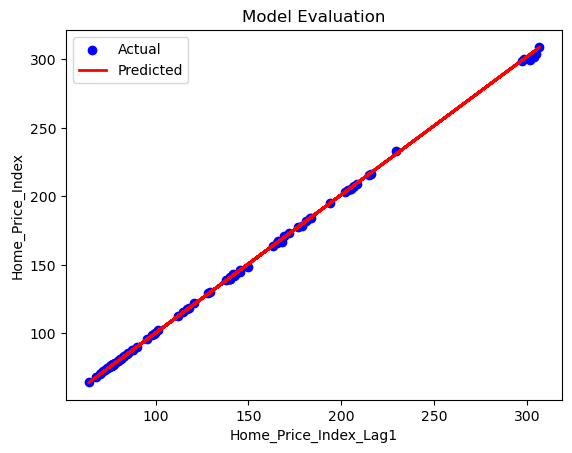

In [8]:
# Step 6: Model Evaluation

import matplotlib.pyplot as plt

# Visualize the model's predictions vs actual values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')
plt.xlabel('Home_Price_Index_Lag1')
plt.ylabel('Home_Price_Index')
plt.title('Model Evaluation')
plt.legend()
plt.show()


In [9]:
# Step 7: Interpret Results

# Display the coefficient of the lagged variable
lagged_variable_coefficient = model.coef_[0]
print(f"Coefficient of Home_Price_Index_Lag1: {lagged_variable_coefficient}")


Coefficient of Home_Price_Index_Lag1: 1.0085034810909994


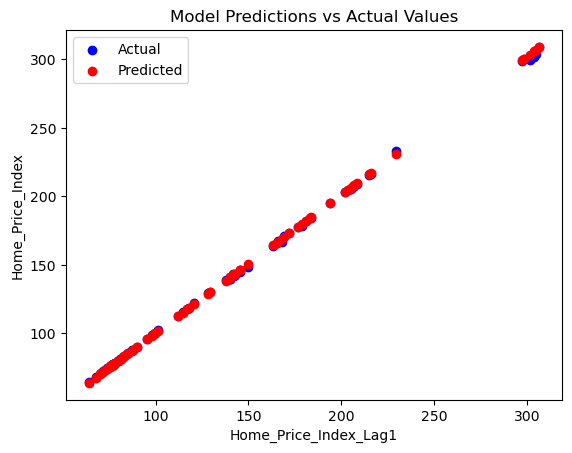

In [10]:
# Visualize predictions vs actual values
plt.scatter(X_test['Home_Price_Index_Lag1'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Home_Price_Index_Lag1'], predictions, color='red', label='Predicted')
plt.xlabel('Home_Price_Index_Lag1')
plt.ylabel('Home_Price_Index')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()


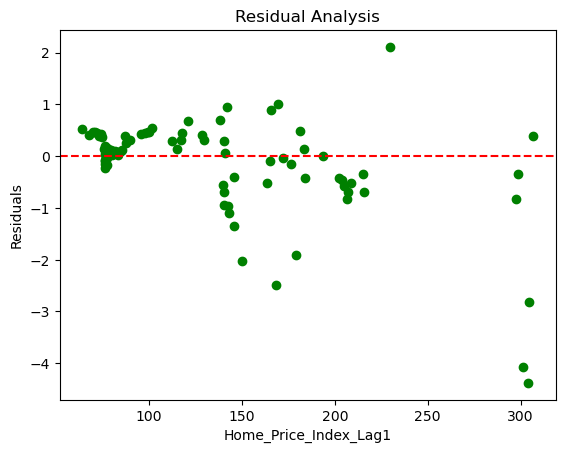

In [11]:
# Calculate residuals
residuals = y_test - predictions

# Visualize residuals
plt.scatter(X_test['Home_Price_Index_Lag1'], residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Home_Price_Index_Lag1')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Mean Squared Error: {-cv_scores.mean()}")


Cross-Validation Mean Squared Error: 1.2885632164151803
